# KNN (K-Nearest Neighbors) Lab

<img src="assets/Data_Science_VD.png" width="400px">

We have been diving into both Hacking Skills and Math and Statistics Knowledge. 

Substantive Expertise (also called Domain Knowledge) is something that unfortunately can not be taught. 

Over the next few lesson, we will look at some machine learning techniques that can be employed to help overcome this short-coming. 

---

## Domain & Data

### Domain

Prepared for the Neural Information Processing Symposium 2003 Feature Extraction Workshop

http://clopinet.com/isabelle/Projects/NIPS2003

### Data 

MADELON is an artificial dataset, which was part of the NIPS 2003 feature selection challenge. This is a two-class classification problem with continuous input variables. The difficulty is that the problem is multivariate and highly non-linear.

![](assets/Large171.jpg)

MADELON is an artificial dataset containing data points grouped in 32 clusters placed on the vertices of a five dimensional hypercube and randomly labeled +1 or -1. The five dimensions constitute 5 informative features. 15 linear combinations of those features were added to form a set of 20 (redundant) informative features. Based on those 20 features one must separate the examples into the 2 classes (corresponding to the +-1 labels). We added a number of distractor feature called 'probes' having no predictive power. The order of the features and patterns were randomized. 



## Problem Statement

The NIPS 2003 challenge in feature selection is to find feature selection algorithms that significantly outperform methods using all features in performing a binary classification task.

![](assets/180px-Binary-classification-labeled.png)



## Solution Statement

We will develop a binary classification model using a K Nearest Neighbors classifier.

<img src="assets/2012-10-26-knn-concept.png" width="400px">


## Metric 

Today, we are largely exploring the dataset. We will use 
the default metric included with the classifier.

## Benchmark

We will be assessing after our work today what an appropriate benchmark might be.

In [12]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

### Load the Dataset into A DataFrame

Unfortunately, the features are nameless. Remember, this is a synthetic dataset. The features are nameless, because they actually have no meaning. As such visualization is going to present a greater challenge in terms of gaining insight into our data before we begin.

In [39]:
feature_datafile_location = "/Users/toddmoffett1/DSI/dsi_repo/DSI_SM_3/data/madelon_data.csv"

In [40]:
madelon_feature_df = pd.read_csv(feature_datafile_location,
                                 sep=' ',
                                 header=None)
madelon_feature_df.columns = ['feat_' + str(col) 
                              for col in madelon_feature_df.columns]
madelon_feature_df.head(1)

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_490,feat_491,feat_492,feat_493,feat_494,feat_495,feat_496,feat_497,feat_498,feat_499
0,485,477,537,479,452,471,491,476,475,473,...,477,481,477,485,511,485,481,479,475,496


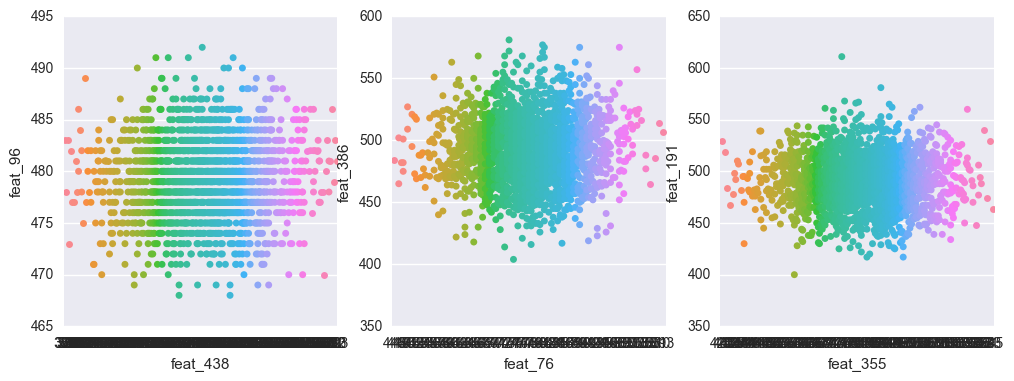

In [41]:
fig = plt.figure(figsize=(12,4))

fig.add_subplot(131)
i = str(np.random.randint(500))
j = str(np.random.randint(500))
sns.swarmplot(x='feat_'+i, 
              y='feat_'+j,
              data=madelon_feature_df)
                            
fig.add_subplot(132)
i = str(np.random.randint(500))
j = str(np.random.randint(500))
sns.swarmplot(x='feat_'+i, 
              y='feat_'+j,
              data=madelon_feature_df)
                            
fig.add_subplot(133)
i = str(np.random.randint(500))
j = str(np.random.randint(500))
sns.swarmplot(x='feat_'+i, 
              y='feat_'+j,
              data=madelon_feature_df)                          

Looking at randomly selected features show very little. 

We can look at the shape of the data.

In [42]:
madelon_feature_df.shape

(2000, 500)

In [43]:
target_datafile_location = "/Users/toddmoffett1/DSI/dsi_repo/DSI_SM_3/data/madelon_labels.csv"

In [44]:
madelon_target_df = pd.read_csv(target_datafile_location,
                                header=None)
madelon_target_df.columns = ['trgt_' + str(col) 
                             for col in madelon_target_df.columns]
madelon_target_df.head(1)

,trgt_0
0,-1


We can look the unique target values.

In [45]:
madelon_target_df['trgt_0'].unique()

array([-1,  1])

We can distribution of the target set.

In [46]:
madelon_target_df.groupby(['trgt_0']).size()

trgt_0
-1    1000
 1    1000
dtype: int64

It appears as though our target set is evenly distributed.

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, \
    X_test, \
    y_train, \
    y_test = train_test_split(madelon_feature_df,
                              madelon_target_df,
                              random_state=42)


In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [50]:
knn.fit(X_train, y_train)


/Users/toddmoffett1/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

It appears as though we are getting a warning from the KNN fit. It is associate with the shape of our target data.

In [51]:
y_train.shape, y_test.shape

((1500, 1), (500, 1))

In [52]:
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [53]:
y_train.shape, y_test.shape

((1500,), (500,))

In [54]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [55]:
print("Train Score: {}".format(knn.score(X_train, y_train)))
print(" Test Score: {}".format(knn.score(X_test, y_test)))

Train Score: 0.819333333333
 Test Score: 0.682


### The Standard Sklearn Template For Classification

1. Load the data
1. Split the data into training and testing sets
1. Create a new model
1. Fit the model
1. Score the model

In [56]:
def standard_classification_knn(X, y, n_neighbors, random_state):
    X_train,     \
        X_test,  \
        y_train, \
        y_test = train_test_split(X, y, 
                                  random_state=random_state)

    y_train = np.ravel(y_train)
    y_test = np.ravel(y_test)
    
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, n_jobs=-1)
    knn.fit(X_train, y_train)
    
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    
    print("{} ".format(n_neighbors), end='')
    
    return {'n_neighbors': n_neighbors,
            'train_score' : train_score,
            'test_score' : test_score}

In [57]:
standard_classification_knn(madelon_feature_df,
                            madelon_target_df,
                            3,
                            random_state=42) 

3 

{'n_neighbors': 3,
 'test_score': 0.70199999999999996,
 'train_score': 0.85733333333333328}

In order to get some context into what this means, we should look at multiple values of train and testing score.

In [58]:
results = [standard_classification_knn(madelon_feature_df,
                                       madelon_target_df,
                                       n_neighbors,
                                       random_state=42) 
           for n_neighbors in range(2,20)]

results_df = pd.DataFrame(results)
results_df.head(2)

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

,n_neighbors,test_score,train_score
0,2,0.628,0.799333
1,3,0.702,0.857333


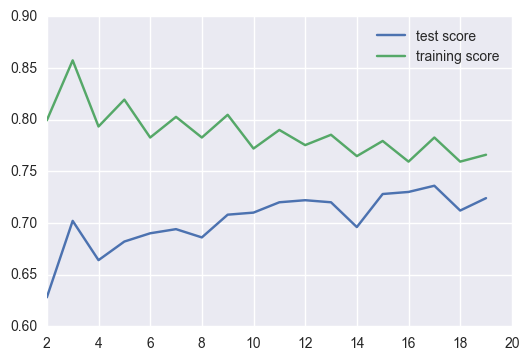

In [59]:
plt.plot(results_df['n_neighbors'], results_df['test_score'], label='test score')
plt.plot(results_df['n_neighbors'], results_df['train_score'], label='training score')
plt.legend()

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

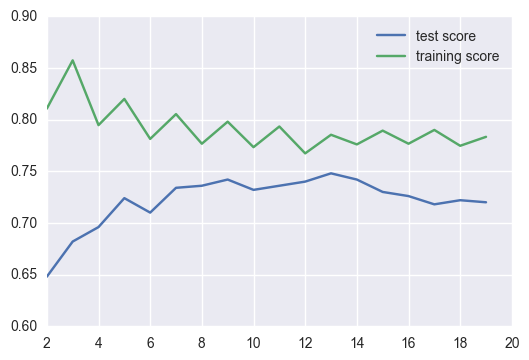

In [60]:
results = [standard_classification_knn(madelon_feature_df,
                                       madelon_target_df,
                                       n_neighbors,
                                       random_state=21) 
           for n_neighbors in range(2,20)]

results_df = pd.DataFrame(results)
plt.plot(results_df['n_neighbors'], results_df['test_score'], label='test score')
plt.plot(results_df['n_neighbors'], results_df['train_score'], label='training score')
plt.legend()


### Why would our performance suffer when we evaluate based upon an even number of neighbors?

In [61]:
def plot_standard_knn_classification_for_odd_values_of_n(X, y, random_state):    
    results = [standard_classification_knn(madelon_feature_df,
                                       madelon_target_df,
                                       n_neighbors,
                                       random_state=random_state) 
           for n_neighbors in range(2,30) if n_neighbors % 2 == 1]

    print()
    
    results_df = pd.DataFrame(results)
    plt.plot(results_df['n_neighbors'], results_df['test_score'], label='test score')
    plt.plot(results_df['n_neighbors'], results_df['train_score'], label='training score')
    plt.legend()

3 5 7 9 11 13 15 17 19 21 23 25 27 29 
3 5 7 9 11 13 15 17 19 21 23 25 27 29 
3 5 7 9 11 13 15 17 19 21 23 25 27 29 
3 5 7 9 11 13 15 17 19 21 23 25 27 29 


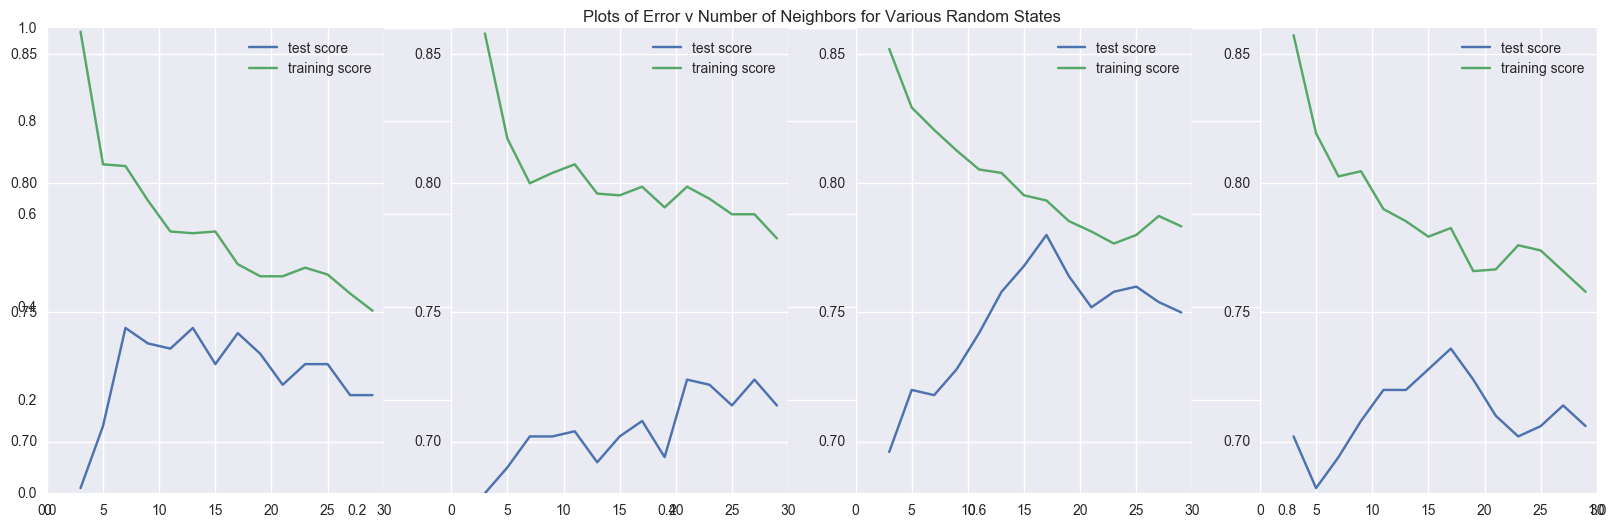

In [62]:
fig = plt.figure(figsize=(20,6))
plt.title('Plots of Error v Number of Neighbors for Various Random States')

fig.add_subplot(141)
plot_standard_knn_classification_for_odd_values_of_n(madelon_feature_df, madelon_target_df, 12)

fig.add_subplot(142)
plot_standard_knn_classification_for_odd_values_of_n(madelon_feature_df, madelon_target_df, 18)

fig.add_subplot(143)
plot_standard_knn_classification_for_odd_values_of_n(madelon_feature_df, madelon_target_df, 25)

fig.add_subplot(144)
plot_standard_knn_classification_for_odd_values_of_n(madelon_feature_df, madelon_target_df, 42)


#### 17 looks good in all plots

In [74]:
results = []
results.append(standard_classification_knn(madelon_feature_df, madelon_target_df, 17, np.random.randint(100)))
results.append(standard_classification_knn(madelon_feature_df, madelon_target_df, 17, np.random.randint(100)))
results.append(standard_classification_knn(madelon_feature_df, madelon_target_df, 17, np.random.randint(100)))
results.append(standard_classification_knn(madelon_feature_df, madelon_target_df, 17, np.random.randint(100)))

17 17 17 17 

In [75]:
results_df= pd.DataFrame(results)

In [76]:
results_df

,n_neighbors,test_score,train_score
0,17,0.744,0.790667
1,17,0.762,0.790667
2,17,0.754,0.791333
3,17,0.746,0.779333


In [77]:
results_df.describe()

,n_neighbors,test_score,train_score
count,4.0,4.000000,4.000000
mean,17.0,0.751500,0.788000
std,0.0,0.008226,0.005786
min,17.0,0.744000,0.779333
25%,17.0,0.745500,0.787833
50%,17.0,0.750000,0.790667
75%,17.0,0.756000,0.790833
max,17.0,0.762000,0.791333


In [78]:
results2 = []
results2.append(standard_classification_knn(madelon_feature_df, madelon_target_df, 27, np.random.randint(100)))
results2.append(standard_classification_knn(madelon_feature_df, madelon_target_df, 27, np.random.randint(100)))
results2.append(standard_classification_knn(madelon_feature_df, madelon_target_df, 27, np.random.randint(100)))
results2.append(standard_classification_knn(madelon_feature_df, madelon_target_df, 27, np.random.randint(100)))

27 27 27 27 

In [79]:
results2_df = pd.DataFrame(results2)

In [80]:
results2_df

,n_neighbors,test_score,train_score
0,27,0.712,0.769333
1,27,0.722,0.769333
2,27,0.724,0.774000
3,27,0.760,0.774000


In [72]:
results2_df.describe()

,n_neighbors,test_score,train_score
count,4.0,4.000000,4.000000
mean,27.0,0.722500,0.774333
std,0.0,0.008699,0.006981
min,27.0,0.714000,0.765333
25%,27.0,0.717000,0.770833
50%,27.0,0.721000,0.775333
75%,27.0,0.726500,0.778833
max,27.0,0.734000,0.781333
